In [2]:
import numpy as np
import matplotlib.pyplot as plt
import csv
k= np.array([3, 0.005,5])
fp_x= k[2]/k[1]
fp_y= k[0]/k[1]
print(fp_x)
print(fp_y)


1000.0
600.0


# Exercise 8: Continuous Markov Process

In this exercise, the Gillespie algorithm is implemented in c to simulate Markov processes that are continuous in time.


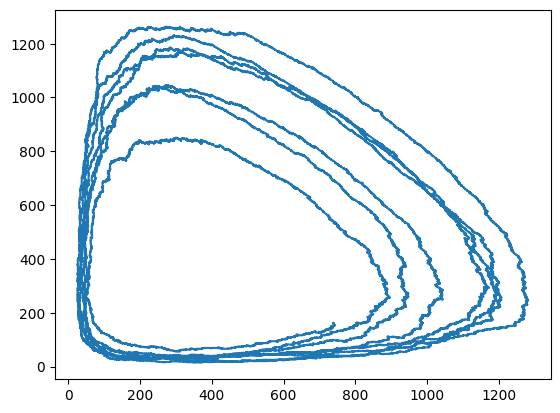

In [17]:
data = []
with open('exercise_8.csv') as csvfile:
    contents= csv.reader(csvfile, delimiter=";")
    next(contents)#skip header line
    for row in contents:
        data.append(np.asarray(row).astype('double'))
at_FP=data[0:3]
away_FP= data[3:6]
furthest_FP= data[6:9]

modified_rate= data[9:12]
#plt.plot(data[0], data[2])
#plt.plot(data[6],data[7])
plt.plot(data[13],data[14])


#plt.scatter(fp_x, fp_y,marker="x", c= "red")

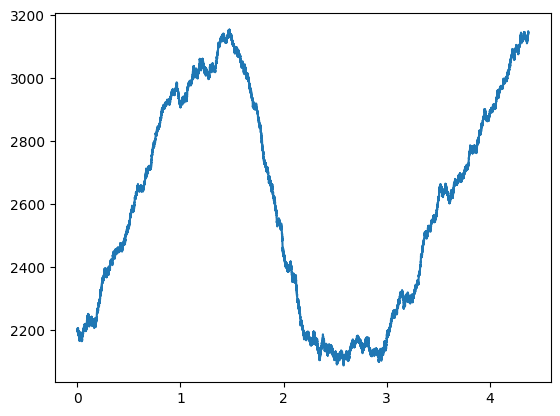

In [22]:
data = []
with open('exercise_8_B.csv') as csvfile:
    contents= csv.reader(csvfile, delimiter=";")
    next(contents)#skip header line
    for row in contents:
        data.append(np.asarray(row).astype('double'))
plt.plot(data[0],data[2])